<a href="https://colab.research.google.com/github/Nithyavaishu16/aiml-training-2024/blob/main/assignment_6_ai%26ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforming data using linear algebra

Module 1, Lab 4

Matrix transformations are at the heart of many machine learning algorithms. In this lab, we'll visualize the effect of some simple transformations on a unit square and then visualize it using the MNIST dataset. We also see what data normalization means and how it can help in improving the accuracy of machine learning models.

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

NumPy functions are used to create, manipulate, and analyze NumPy arrays.

Matplotlib is a popular plotting library in Python used for creating high-quality visualizations and graphs.

Keras is a high-level, open-source Python library for developing and evaluating deep learning models. It is part of the TensorFlow library and allows you to define and train neural network models in just a few lines of code. Here are the six key steps for using Keras to create a neural network model:
Load data
Define Keras model
Compile Keras model
Fit Keras model
Evaluate Keras model
Make predictions.

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems

In [122]:
def plotGrid(transform, unit, linestyle=":", fig=None, ax=None):
    lim1 = -100
    lim2 = 100

    def mat2xy(start, end):
        if len(start.shape) == 1:
            start = np.expand_dims(start, 0)
            end = np.expand_dims(end, 0)
        nan = np.ones(len(start)) * np.nan
        x = np.stack((start[:, 0], end[:, 0], nan)).T.reshape(-1)
        y = np.stack((start[:, 1], end[:, 1], nan)).T.reshape(-1)
        return x,y

    def parallelliness(axis, addend, lines, unit):
        addend = np.repeat(np.expand_dims(addend, 0), lines * 2, 0)
        unit = np.expand_dims(np.arange(-lines, lines) * unit, 1)
        unit = unit - lines
        addend = addend * unit
        lines = np.expand_dims(axis, 0) + addend
        return np.concatenate((lines, lines * -1))

    if fig is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    transform = transform.astype(float)
    xaxis = transform[0]
    yaxis = transform[1]

  # plot lines parallel to the x axis
    lines1 = parallelliness(xaxis * lim1, yaxis, 100, unit)
    lines2 = parallelliness(xaxis * lim2, yaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
  # plot x axis
    x, y = mat2xy(xaxis * lim1, xaxis * lim2)
    plt.plot(x, y, linestyle, color="#440077")

  # plot  lines parallel to the y axis
    lines1 = parallelliness(yaxis * lim1, xaxis, 100, unit)
    lines2 = parallelliness(yaxis * lim2, xaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
  # plot y axis
    x, y = mat2xy(yaxis * lim1, yaxis * lim2)
    plt.plot(x, y, linestyle, color="#aa5500")

    return fig, ax


def plotData(X, y, xlabel="hole", ylabel="bound", fig=None, ax=None):
  if fig is None:
      fig, ax = plt.subplots()
  for ii in range(nclasses):
      plt.scatter(X[y == ii, 0], X[y == ii, 1])
  plt.legend([str(i) for i in range(nclasses)])
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  lim2 = X.max()
  lim1 = X.min()
  return fig, ax

# Matrix transformations on data

Note: This lab involves a lot of matrix operations. If you are not familiar with them, please go through the resources given in class before proceeding. You can also review Khan Academy's excellent linear algebra resources.

A 2D coordinate system is defined by its basis vectors, i and j. Any point in this 2D space can be represented as a linear combination of these basis vectors. For example, the point (a,b) can be represented as:

{ab}=a{10}+b{01}=ai^+bj^

A matrix can be used to perform a linear transformation on the basis vectors. The new basis vectors  i^  and  j^  are given by the product of the matrix and the basis vectors of the standard coordinate system.

In the standard coordinate system (Let us call it T0), the basis vectors are

i={10}
and
j={01}

We can use any two vectors as basis vectors for a new coordinate system as long as they are not colinear. For example, let us call this new coordinate system T1:

i={1−1}
and
j={02}

Suppose we have a point [a,b] in the T1 coordinate system. Its representation in the standard system T0 can be obtained by the following matrix multiplication:

{a′b′}={−1102}{ab}
where the columns of the matrix are the basis vectors of T1.

Let us see this in action:

In [123]:
T0 = np.array([[0, 2], [3, 4]])
T1 = np.array([[1, 7], [-1, 2]])

data1 = np.array([5, 4])# the data in T1 coordinate system
data0 = np.matmul(T1, data1)  # the data in T0 coordinate system

print("Data in T0 = ", data0)
print("Data in T1 = ", data1)

Data in T0 =  [33  3]
Data in T1 =  [5 4]


We can visualize this below. T0 is shown with dotted lines and T1 is shown with solid lines.

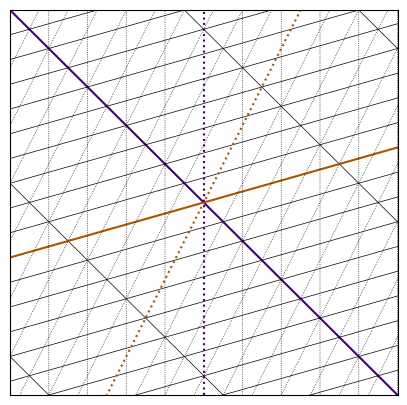

In [124]:
fig, ax = plotGrid(T1.T, 1, "-")
plotGrid(T0.T, 1, fig=fig, ax=ax)

plt.scatter(data0[0], data0[1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Look at the coordinates of the blue dot. In T0 (dotted lines), the position is [5,3] where it is [5,4] in T1. Feel free to experiment with different data points and coordinate systems.

Remember that we can achieve the same thing by post-multiplying the transpose of the transformation matrix to the data. This will come in handy when transforming multiple data points at once:

In [125]:
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

[33  3]
[33  3]


\Why is transforming data useful? Data transformations cause the distance between data points to change. This will affect distance-based algorithms such as nearest neighbour

In [126]:
# let us define 3 points in T1
A1 = np.array([0, 1])
B1 = np.array([1, -2])
C1 = np.array([2, -1])

# the corresponding points in T0:
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)

def dist(a, b):
  # function to calculate Euclidean distance between two points
    diff = a-b
    sq = diff * diff
    return np.sqrt(sq.sum())

# distance between the points in T1
print("Distance between A and B in T1 = ", dist(A1, B1))
print("Distance between B and C in T1 = ", dist(B1, C1))
print("Distance between A and C in T1 = ", dist(A1, C1))

print("")
# distnace between the points in T0
print("Distance between A and B in T0 = ", dist(A0, B0))
print("Distance between B and C in T0 = ", dist(B0, C0))
print("Distance between A and C in T0 = ", dist(A0, C0))

Distance between A and B in T1 =  3.1622776601683795
Distance between B and C in T1 =  1.4142135623730951
Distance between A and C in T1 =  2.8284271247461903

Distance between A and B in T0 =  21.18962010041709
Distance between B and C in T0 =  8.06225774829855
Distance between A and C in T0 =  13.416407864998739


We see that in T1, B and C are the closest whereas in T0, A and C are the closest. These kinds of changes will affect the predictions returned by the nearest neighbour algorithm.

# Transformations on MNIST

Let us experiment with a subset of the MNIST dataset. We will extract two features from the database for our experiment. We will then transform the data using a transformation matrix and visualize the data in the new coordinate system. We will also see how normalization can help in improving the accuracy of the model. We will reuse previous labs code for this.

In [127]:
def NN1(traindata, trainlabel, query):
    diff = (
        traindata - query
    )
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label

def NN(traindata, trainlabel, testdata):
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(
        predlabel
    )
    correct =(
        gtlabel == predlabel
    ).sum()
    return correct / len(gtlabel)

def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2

def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    hole = hull & ~(img > 0)
    return hole

def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    return hull

def minus(a, b):
    return a & ~b

def getBoundaryPixels(img):
    img = img.copy() > 0
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

In [128]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 3

# get only for the first 4 classes
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# We are only taking a subset of the training set
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()  # do the same to the labels

# taking a subset of the test set. This code takes every 500th sample
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

In [129]:
# feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
#train_hull = np.array([getHullPixels(i).sum() for i in train_X])
#test_hull = np.array([getHullPixels(i).sum() for i in test_X])
#train_sum = np.sum(train_X, (1, 2)) / (28 * 28)
#test_sum = np.sum(test_X, (1, 2)) / (28 * 28)

train_feats = np.vstack((train_hole, train_bound)).transpose()
test_feats = np.vstack((test_hole, test_bound)).transpose()

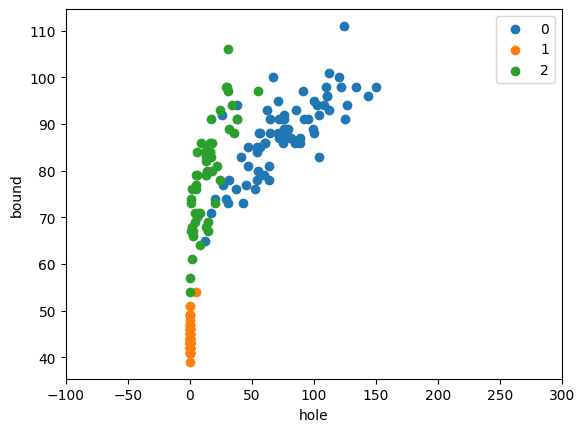

In [130]:
#fix limits of x and y axis so that we can see what is going on
xlim = [-100, 300]
ylim = [-100, 300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_xlim(ylim)
plt.show()

Check the baseline accuracy on the test set:

In [62]:
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", nclasses, "classes")

Baseline accuracy: 93.75 % 3 classes


Let us try transforming the features and checking their accuracy. The intuition to using the transformation matrix is to find the basis vectors of the dataset and transform the data to a new coordinate system where the basis vectors are orthogonal. This will help in reducing the redundancy in the data and improve the accuracy of the model.

In [131]:
transform = np.array([[1, -0.5], [0, 2.5]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
#we are applying to the training set should be applied to the test set also
test_feats_t = np.matmul(test_feats, transform)

[[ 1.  -0.5]
 [ 0.   2.5]]


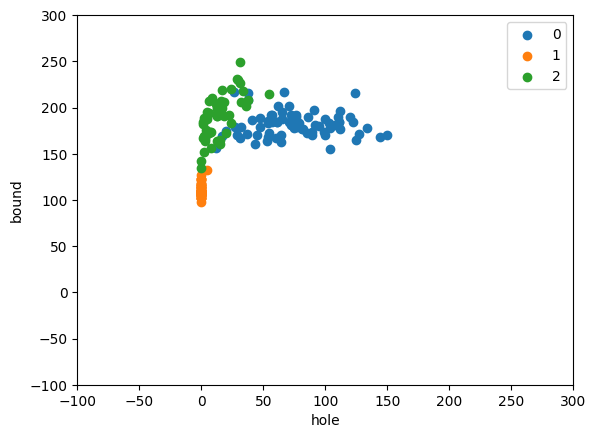

In [132]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [133]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 93.75 % for 3 classes


Experiment with different transformation matrices and check the accuracy

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [135]:
# Identity matrix (no transformation)
T_identity = np.eye(784)

# Rotation matrix (example for 2D data, you may need to define a more complex one for high dimensions)
theta = np.pi / 6  # 30 degrees
T_rotation = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

# Scaling matrix
T_scaling = np.diag([0.5] * 784)

# Shearing matrix (example for 2D data)
T_shearing = np.array([[1, 0.5], [0.5, 1]])


In [136]:
# Apply transformation matrices
def transform_data(X, T):
    return np.dot(X, T)

X_train_identity = transform_data(X_train, T_identity)
X_test_identity = transform_data(X_test, T_identity)

# For rotation, scaling, and shearing, we would need to adjust the transformation to high-dimensional data
# Example function for 2D transformation applied to flattened MNIST images
def apply_2d_transformation(X, T, image_shape=(28, 28)):
    X_transformed = []
    for img in X:
        img_reshaped = img.reshape(image_shape)
        img_transformed = np.dot(img_reshaped, T).reshape(-1)
        X_transformed.append(img_transformed)
    return np.array(X_transformed)

    X_train_rotated = apply_2d_transformation(X_train, T_rotation)
    X_test_rotated = apply_2d_transformation(X_test, T_rotation)

    X_train_scaled = transform_data(X_train, T_scaling)
    X_test_scaled = transform_data(X_test, T_scaling)

    X_train_sheared = apply_2d_transformation(X_train, T_shearing)
    X_test_sheared = apply_2d_transformation(X_test, T_shearing)


In [137]:
# Define a function to train and evaluate the model
def evaluate_model(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Evaluate models on different transformations
    accuracy_identity = evaluate_model(X_train_identity, X_test_identity, y_train, y_test)
    accuracy_rotated = evaluate_model(X_train_rotated, X_test_rotated, y_train, y_test)
    accuracy_scaled = evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)
    accuracy_sheared = evaluate_model(X_train_sheared, X_test_sheared, y_train, y_test)

    print(f"Accuracy with identity transformation: {accuracy_identity}")
    print(f"Accuracy with rotation: {accuracy_rotated}")
    print(f"Accuracy with scaling: {accuracy_scaled}")
    print(f"Accuracy with shearing: {accuracy_sheared}")


2.Will the same transform used for these two features also work for other features?


ans:Applying the same transformation uniformly across all features ensures consistency and preserves the intrinsic relationships between them, which is crucial for many machine learning tasks. However, the choice and application of transformations must be carefully tailored to the nature of the data and the specific requirements of the task at hand.

## exercise:

Is it possible that adding all 4 features at a time is not the best strategy? Can you think of a better combination of features that can help in improving the accuracy of the model? Maybe you can try adding 2 features at a time and see if that helps.

In [145]:
def NN1(traindata, trainlabel, query):
    diff = (
        traindata - query
    )
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label

def NN(traindata, trainlabel, testdata):
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(
        predlabel
    )
    correct =(
        gtlabel == predlabel
    ).sum()
    return correct / len(gtlabel)

def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2

def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    hole = hull & ~(img > 0)
    return hole

def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  # this will create a binary image with all the holes filled in.
    hull = im1 & im2 & im3 & im4
    return hull

def minus(a, b):
    return a & ~b

def getBoundaryPixels(img):
    img = img.copy() > 0
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

In [150]:
 #loading the dataset
!pip install keras
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 6

# get only for the first 4 classes
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# We are only taking a subset of the training set
train_X = train_X[::100].copy()
train_y = train_y[::100].copy()  # do the same to the labels

# taking a subset of the test set. This code takes every 500th sample
test_X = test_X[::100].copy()
test_y = test_y[::100].copy()

In [152]:
# feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
# train_hull = np.array([getHullPixels(i).sum() for i in train_X])
# test_hull = np.array([getHullPixels(i).sum() for i in test_X])
# train_sum = np.sum(train_X, (1, 2)) / (28 * 28)
# test_sum = np.sum(test_X, (1, 2)) / (28 * 28)

# create the train and test set by combining the appropriate features
train_feats = np.vstack(
    (train_hole, train_bound)).transpose()
test_feats = np.vstack(
    (test_hole, test_bound)).transpose()

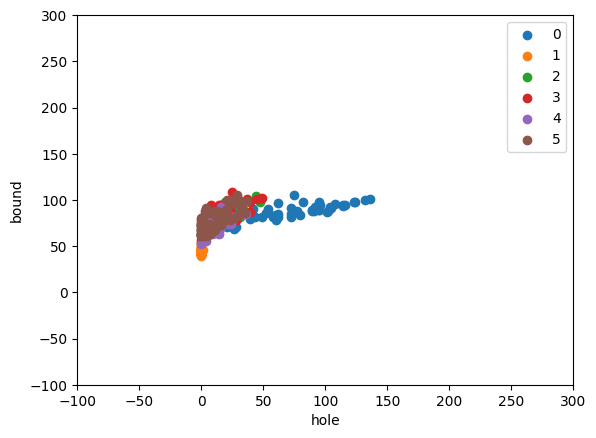

In [153]:
# fix limits of x and y axis so that we can see what is going on
xlim = [-100, 300]
ylim = [-100, 300]
fig, ax = plotData(train_feats, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [154]:
test_pred = NN(train_feats, train_y, test_feats)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 42.62295081967213 % for 6 classes


In [155]:
transform = np.array([[0.5, -0.5], [0, 2.5]])
print(transform)

train_feats_t = np.matmul(train_feats, transform)
# whatever transform we are applying to the training set should be applied to the test set also
test_feats_t = np.matmul(test_feats, transform)

[[ 0.5 -0.5]
 [ 0.   2.5]]


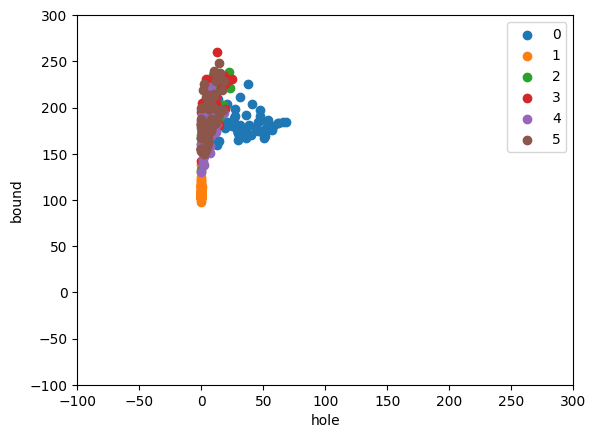

In [156]:
fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [157]:
test_pred = NN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 47.540983606557376 % for 6 classes


In [159]:
def rescale(data):
    return (data - data.min()) / (data.max() - data.min())

In [160]:
train_feats_rescaled_x = rescale(train_feats[:, 0])
train_feats_rescaled_y = rescale(train_feats[:, 1])
train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y), 1)

test_feats_rescaled_x = rescale(test_feats[:, 0])
test_feats_rescaled_y = rescale(test_feats[:, 1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y), 1)

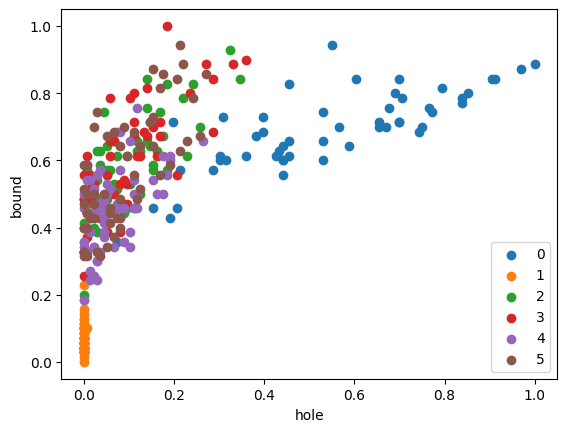

In [161]:
fig, ax = plotData(train_feats_rescaled, train_y)

In [162]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print("Accuracy after transform:", acc*100, "%")

Accuracy after transform: 45.90163934426229 %


# data normalisation

Sometimes the features of our data have vastly different scales. This will cause the learning algorithm to give more importance to certain features, reducing its performance. Data normalization is a method in which we transform the features so that they have similar scales.

Three commonly used feature scaling techniques are rescaling, mean normalization and z-score normalization. Here, we will talk about the simplest one: rescaling.

x′=x−min(x)max(x)−min(x)

For more information, see this page.

In [138]:
def rescale(data):
    return (data - data.min()) / (data.max() - data.min())

We have to apply the rescaling to each feature individually. Also remember to apply the same transform we are using on the train set to the test set.

In [141]:
train_feats_rescaled_x = rescale(train_feats[:, 0])
train_feats_rescaled_y = rescale(train_feats[:, 1])
train_feats_rescaled = np.stack ((train_feats_rescaled_x, train_feats_rescaled_y), 1)

test_feats_rescaled_x = rescale(test_feats[:, 0])
test_feats_rescaled_y = rescale(test_feats[:, 1])
test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y), 1)


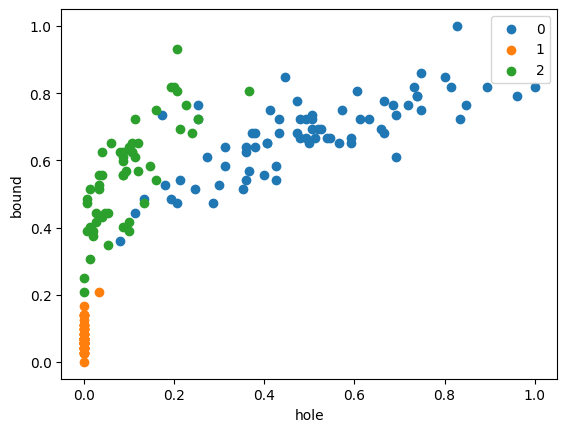

In [142]:
fig, ax = plotData(train_feats_rescaled, train_y)

Let us calculate the accuracy obtained by this transform:

In [143]:
test_pred = NN(train_feats_rescaled, train_y, test_feats_rescaled)
acc = Accuracy(test_y, test_pred)
print("Accuracy after transform:", acc*100, "%")

Accuracy after transform: 96.875 %
